# Spin Echo

## 1. a)

In [36]:
import sys
# !conda install --yes --prefix {sys.prefix} numpy
# !conda install --yes --prefix {sys.prefix} qiskit
# !conda install --yes --prefix {sys.prefix} matplotlib

In [3]:
import numpy as np
from qiskit import *
from matplotlib import pyplot
from math import pi

In [51]:
thetas = [i*pi/10 for i in range(0,11)]
counts_arr = [ [] for i in range(len(thetas)) ]

for i, theta in enumerate(thetas):
    
    # Build circuit
    qc = QuantumCircuit(1,1)
    qc.h(0)
    qc.rz(theta,0)
    qc.h(0)
    qc.measure(0,0)
    qc.draw()

    # Simulate circuit using Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc)
    
    # collect counts of simulation output
    counts_arr[i].append( counts['0'] if '0' in counts else 0 )
    counts_arr[i].append( counts['1'] if '1' in counts else 0 )
    
    print(f'theta={i}/10*pi\tcounts:',counts)



theta=0/10*pi	counts: {'0': 1024}
theta=1/10*pi	counts: {'1': 22, '0': 1002}
theta=2/10*pi	counts: {'1': 108, '0': 916}
theta=3/10*pi	counts: {'1': 200, '0': 824}
theta=4/10*pi	counts: {'1': 343, '0': 681}
theta=5/10*pi	counts: {'1': 509, '0': 515}
theta=6/10*pi	counts: {'0': 335, '1': 689}
theta=7/10*pi	counts: {'1': 840, '0': 184}
theta=8/10*pi	counts: {'0': 84, '1': 940}
theta=9/10*pi	counts: {'0': 37, '1': 987}
theta=10/10*pi	counts: {'1': 1024}


In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(counts_arr):

    zeros = [count[0] for count in counts_arr]
    ones = [count[1] for count in counts_arr]

    fig, ax = plt.subplots()
    labels = [f'{i}/10*pi' for i in range(len(thetas))]
    x = np.arange(len(labels))
    width=0.35

    c1 = ax.bar(x - width/2, zeros, width, label='Output = 0')
    c2 = ax.bar(x + width/2, ones, width, label='Output = 1')

    ax.set_ylabel('Counts')
    ax.set_xlabel('Theta')
    ax.set_title('Averaged Output Counts vs. Theta')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(c1, padding=3)
    ax.bar_label(c2, padding=3)

    fig.set_size_inches(12, 9)

    plt.show()

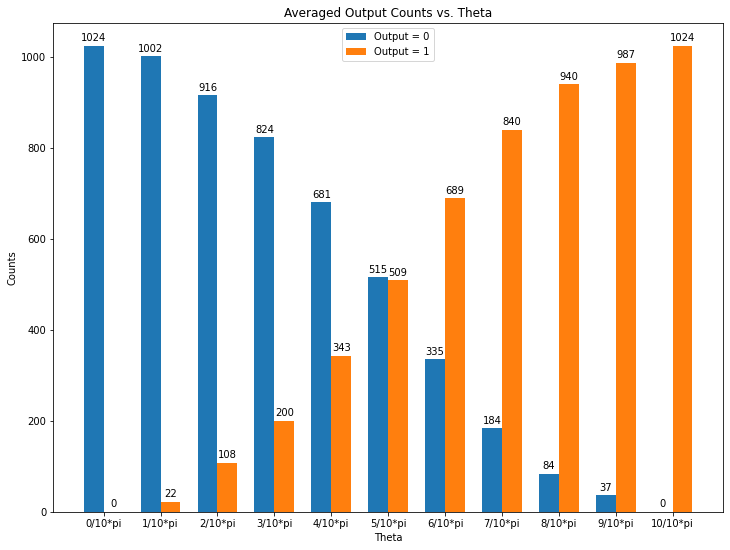

In [56]:
plot_results(counts_arr)

## 1. b)